In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [72]:
data = np.load("data.npy")
x = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
std_scale = preprocessing.StandardScaler().fit(x)
x = std_scale.transform(x)
n = np.size(x, 0)
x = np.c_[np.ones(n), x]
w = np.array([[0], [1]])
eta=0.05
delta=0.1
lam=0.001

In [55]:
def g_delta(w, xi, yi, delta):
    xi = np.array([xi])
    yi = np.array([yi])
    prediction = np.dot(xi, w)
    if (prediction - yi) <= -delta:
        return np.square(prediction - yi + delta)
    elif abs(yi - prediction) < delta:
        return 0
    else:
        return np.square(prediction - yi - delta)


def g_delta_derivative(w, xi, yi, delta):
    xi = np.array([xi])
    yi = np.array([yi])
    error = np.dot(xi, w) -yi
    if error <= -delta:
        return 2 * np.dot(xi.T, error + delta)
    elif abs(error) < delta:
        return np.zeros(w.shape)
    else:
        return 2 * np.dot(xi.T, error - delta)


def f_w(w, x, y, delta, lam):
    n = np.size(x, 0)
    g_delta_x = np.array([g_delta(w, xi, yi, delta) for xi, yi in zip(x, y)])
    return (1/n) * np.sum(g_delta_x) + np.sum(np.square(w))


def f_w_derivative(w, x, y, delta, lam):
    n = np.size(x, 0)
    g_delta_derivative_x = np.array([g_delta_derivative(w, xi, yi, delta) for xi, yi in zip(x, y)])
    return (1 / n) * np.sum(g_delta_derivative_x, 0) + 2 * lam * w

def y_error(w, x, y):
    n = np.size(x,0)
    return (1/2*n) * np.sum(np.square(np.dot(x, w) -y))

def y_error_der(w, x, y):
    n = np.size(x,0)
    return (1/n) *np.dot(x.T, np.dot(x, w) -y)

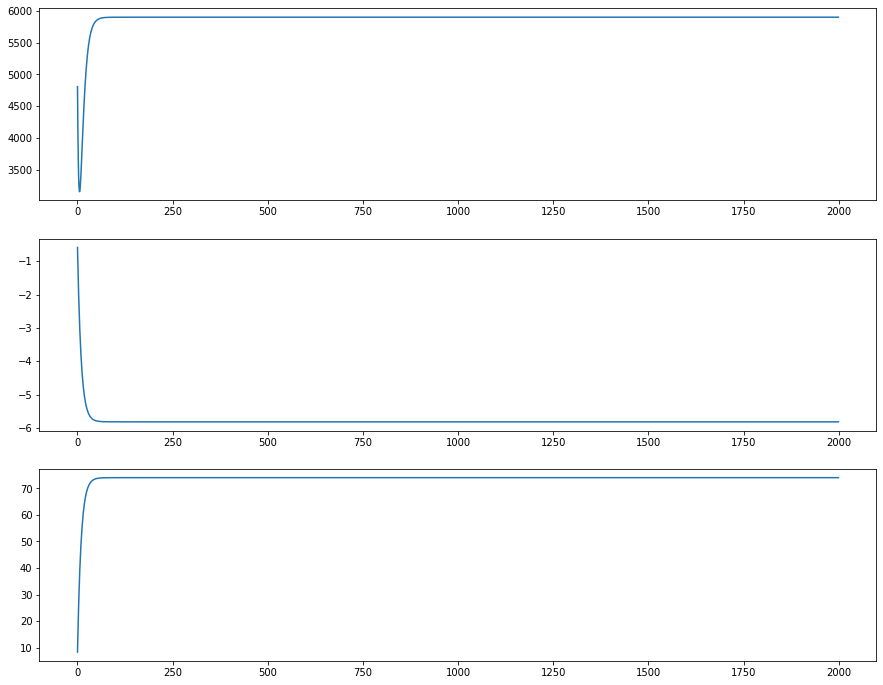

In [78]:
w = np.array([[0], [1]])
n_iter = 2000
w_history = np.zeros((n_iter,2))
history_fw = np.zeros(n_iter)
for it in range(n_iter):
        prediction = f_w_derivative(w, x, y, delta, lam)
        w = w - eta * prediction
        history_fw[it] = f_w(w, x, y, delta, lam)
        w_history[it] = w.T
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,12))
ax1.plot(history_fw)
ax2.plot(w_history[:,0])
ax3.plot(w_history[:,1])

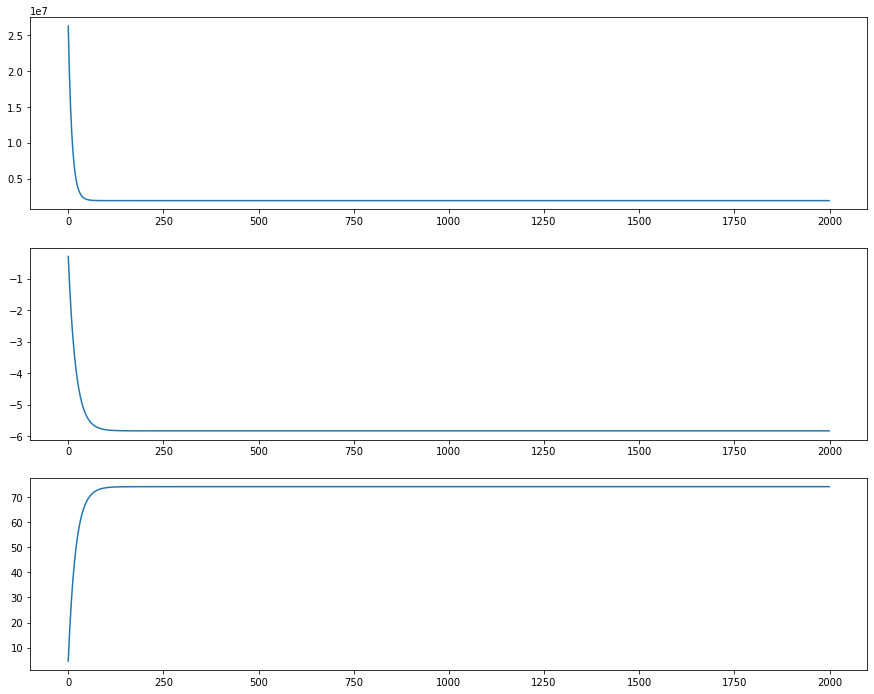

In [77]:
w = np.array([[0], [1]])
n_iter = 2000
w_history = np.zeros((n_iter,2))
history_fw = np.zeros(n_iter)
for it in range(n_iter):
        prediction = y_error_der(w, x, y)
        w = w - eta * prediction
        history_fw[it] = y_error(w, x, y)
        w_history[it] = w.T
fig, (ax1,ax2,ax3) = plt.subplots(3,1,figsize=(15,12))
ax1.plot(history_fw)
ax2.plot(w_history[:,0])
ax3.plot(w_history[:,1])